# 유튜브 랭킹 시각화

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [1]:
# 한글 폰트 사용을 위한 설정
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [2]:
# 파일 업로드
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 유튜브_순위.csv to 유튜브_순위.csv


In [3]:
df = pd.read_csv(filename)
df.head()

,카테고리,채널명,구독자수,조회수,비디오수
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579"
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729"
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223


In [4]:
# 구독자수(문자열) --> 구독자수2(정수)
df['구독자수2'] = df.구독자수.apply(lambda x: int(x.replace(',', ''))) # int('64,300')은 ,가 있기 때문에 정수형으로 바꾸는 것이 불가능함.

In [5]:
df.head()

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371,64000000
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654,60300000
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729",28500000
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000


In [6]:
def str2int(x):
    return int(x.replace(',', ''))

In [7]:
df['비디오수2'] = df.비디오수.apply(str2int)
df.head()

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2,비디오수2
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371,64000000,371
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654,60300000,654
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000,1579
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729",28500000,3729
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000,223


- 비디오수 Top20 (채널명, 비디오수) 막대 그래프

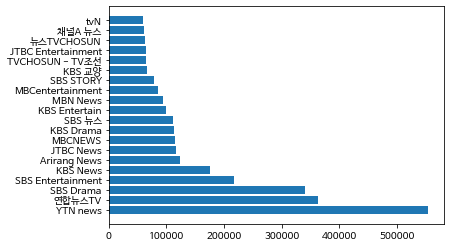

<Figure size 864x576 with 0 Axes>

In [70]:
# 방법1 - plt.barh
df2 = df.sort_values(by='비디오수2', ascending=False)[:20]

plt.barh(df2['채널명'], df2['비디오수2'])
plt.figure(figsize=(12,8))
plt.show()

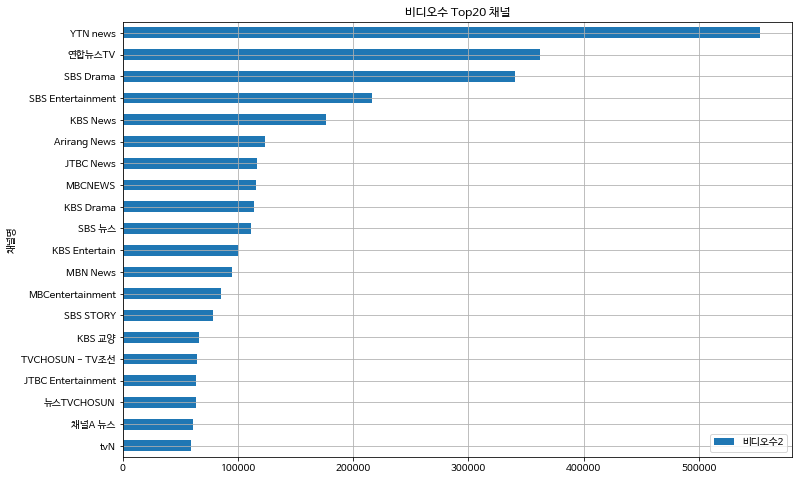

In [58]:
# 방법2 - pandas.plot(kind='barh')
df2 = df[['채널명', '비디오수2']].sort_values(by='비디오수2', ascending=False)
df2.set_index('채널명', inplace=True)
df2.head(20).sort_values(by='비디오수2').plot(kind='barh', grid=True, figsize=(12, 8))
plt.title('비디오수 Top20 채널')
plt.show()

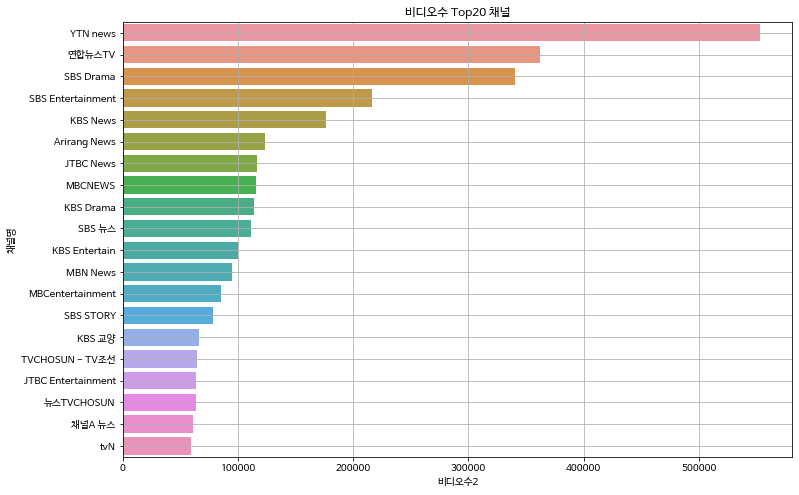

In [100]:
# 방법3 - seaborn.barplot
import seaborn as sns

df2 = df[['채널명', '비디오수2']].sort_values(by='비디오수2', ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(y='채널명', x='비디오수2', data=df2.head(20))
plt.title('비디오수 Top20 채널')
plt.grid()
plt.show()

- 조회수 기준 Top20 채널 시각화

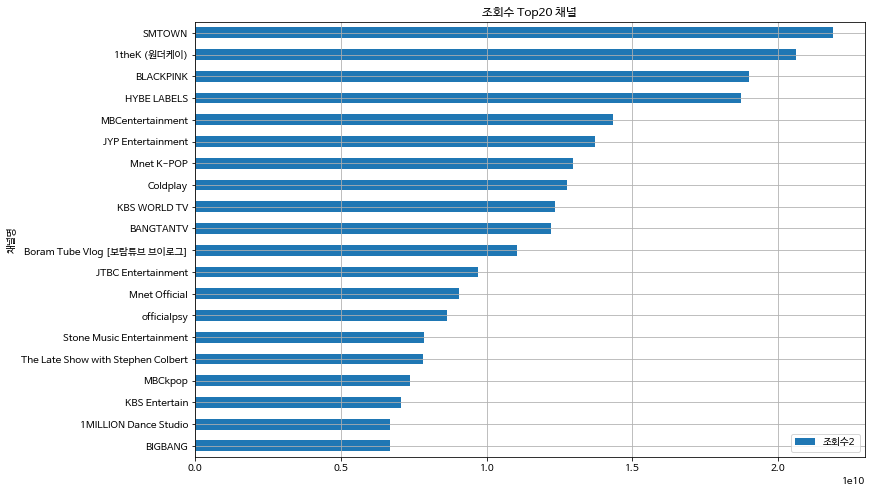

In [76]:
# 방법1 - pandas.plot(kind='barh')
df['조회수2'] = df.조회수.apply(str2int)
df3 = df[['채널명', '조회수2']].sort_values(by='조회수2', ascending=False).head(20)
df3.set_index('채널명').sort_values(by='조회수2').plot(kind='barh', grid=True, figsize=(12, 8))
plt.title('조회수 Top20 채널')
plt.show()

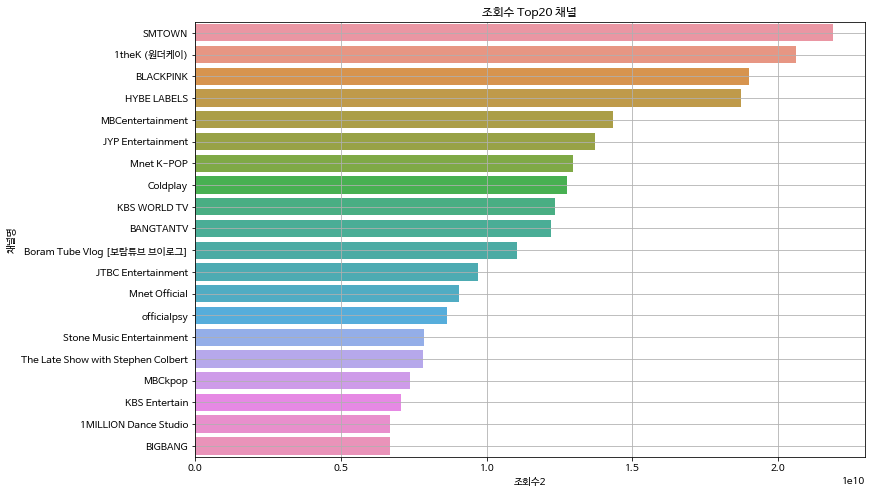

In [101]:
# 방법2 - seaborn.barplot
plt.figure(figsize=(12,8))
sns.barplot(x='조회수2', y='채널명', data=df[['채널명', '조회수2']].sort_values(by='조회수2', ascending=False).head(20))
plt.title('조회수 Top20 채널')
plt.grid()
plt.show()

- 카테고리별 채널수 분포

In [77]:
df.카테고리.value_counts() # 결과를 시리즈로 출력, 내림차순 정렬

음악/댄스/가수     171
TV/방송        146
미분류          114
키즈/어린이        88
음식/요리/레시피     85
게임            74
BJ/인물/연예인     71
뉴스/정치/사회      53
패션/미용         44
취미/라이프        38
영화/만화/애니      33
교육/강의         22
애완/반려동물       19
주식/경제/부동산      8
IT/기술/컴퓨터      8
스포츠/운동         8
해외             6
회사/오피셜         5
국내/해외/여행       4
자동차            2
취미             1
Name: 카테고리, dtype: int64

In [79]:
df.카테고리.value_counts().to_frame() # 결과를 프레임으로 출력, 내림차순 정렬이 되어있음.

,카테고리
음악/댄스/가수,171
TV/방송,146
미분류,114
키즈/어린이,88
음식/요리/레시피,85
게임,74
BJ/인물/연예인,71
뉴스/정치/사회,53
패션/미용,44
취미/라이프,38


In [80]:
df[['카테고리', '채널명']].groupby('카테고리').count()

,채널명
카테고리,
BJ/인물/연예인,71
IT/기술/컴퓨터,8
TV/방송,146
게임,74
교육/강의,22
국내/해외/여행,4
뉴스/정치/사회,53
미분류,114
스포츠/운동,8


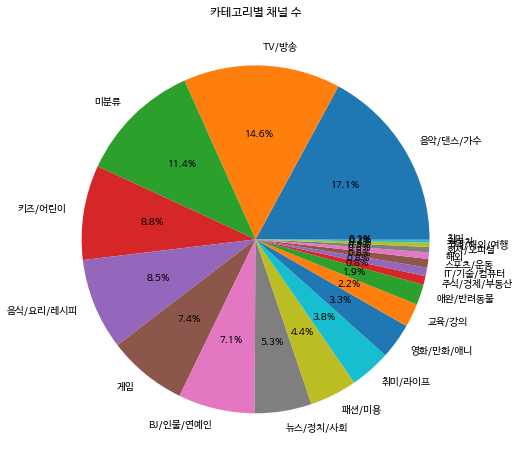

In [16]:
df3 = df['카테고리'].value_counts().to_frame()

plt.figure(figsize=(12,8))
plt.pie(df3.카테고리, labels=df3.index, autopct='%.1f%%') 
#plt.pie('카테고리', labels=df3.index, data=df3, autopct='%.1f%%')
plt.title('카테고리별 채널 수')
plt.show()

- 카테고리별 구독자수 합계 시각화

In [18]:
df4 = df[['카테고리', '구독자수2']].groupby('카테고리').agg(['count', 'sum'])
df4.columns = ['채널수', '구독자수_합계']
df4.sort_values(by='구독자수_합계', ascending=False, inplace=True)
df4

,채널수,구독자수_합계
카테고리,,
음악/댄스/가수,171,674180000
키즈/어린이,88,257740000
TV/방송,146,229720000
음식/요리/레시피,85,180570000
미분류,114,143340000
BJ/인물/연예인,71,97560000
뉴스/정치/사회,53,71030000
게임,74,67170000
취미/라이프,38,47890000


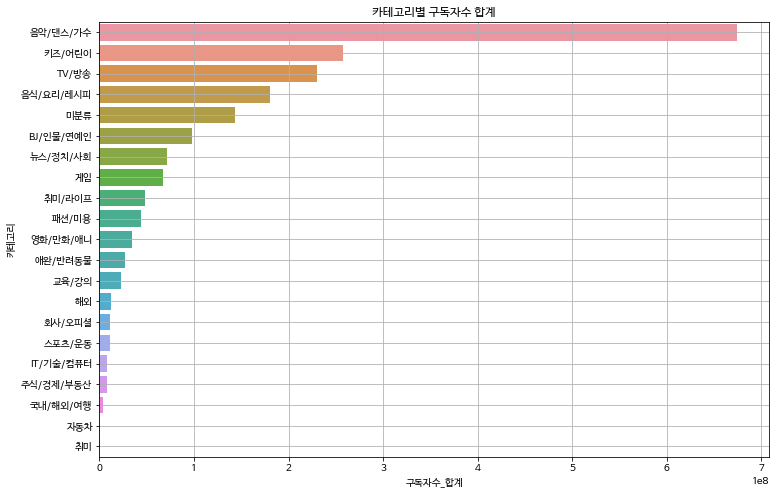

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(x='구독자수_합계', y=df4.index, data=df4)
plt.title('카테고리별 구독자수 합계')
plt.grid()
plt.show()

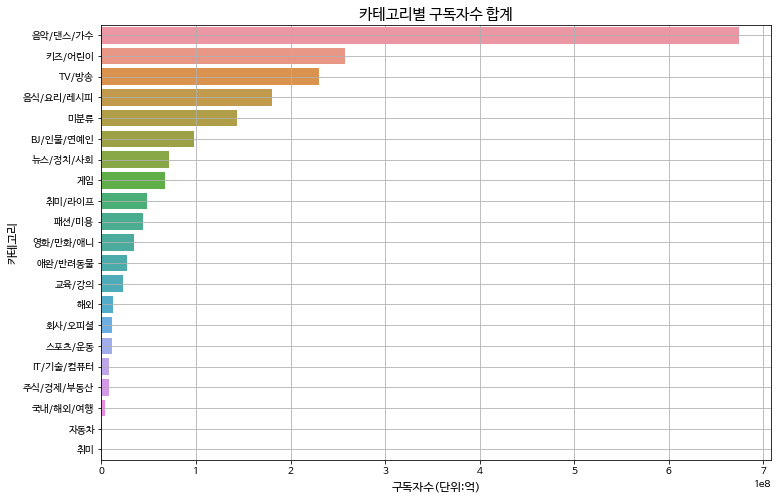

In [28]:
df_new = df[['카테고리', '구독자수2']].groupby('카테고리').agg(['count','sum']) \
                .reset_index().sort_values(by=('구독자수2', 'sum'), ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x= ('구독자수2', 'sum'), y='카테고리', data=df_new)
plt.title('카테고리별 구독자수 합계', size=15)
plt.xlabel('구독자수(단위:억)', size=12)
plt.ylabel('카테고리', size=12)
plt.grid()
plt.show()

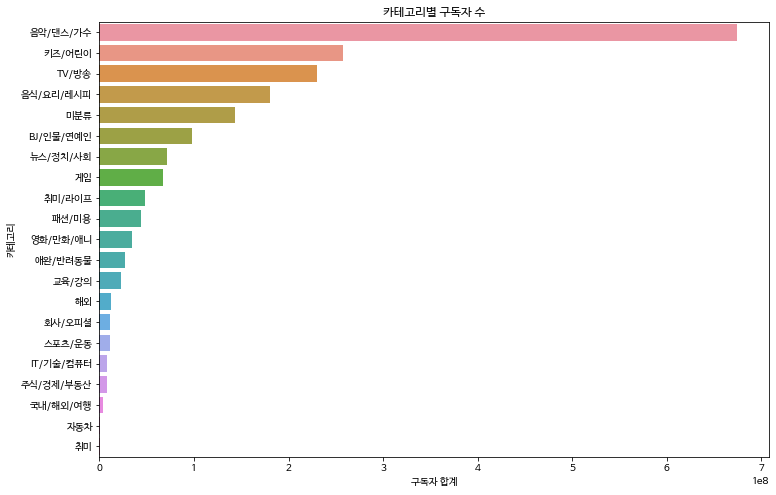

In [30]:
df5 = df.groupby('카테고리').sum().sort_values(by='구독자수2', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='구독자수2', y=df5.index, data=df5)
plt.xlabel('구독자 합계')
plt.title('카테고리별 구독자 수')
plt.show()